In [1]:
import os
if os.getcwd() != "/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM":
    os.chdir("../../")
from PotentialFlowSolver import *
if os.getcwd() == "/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM":
    os.chdir("./Potential_flow_solver/PotentialFlowSolverCLS")

Libraries fetched!...



In [2]:
kwargs = {"ylim":[-4,4], "V_inf": 10, "g_div": 70, "write":True,
           "n_airfoil": 1000,
           "n_fs": 20,
           "n_bed": 20,
           "n_inlet": 10,
           "n_outlet": 10}
model = PotentialFlowSolver("0025", alpha = 10, P=4, kwargs = kwargs)

In [8]:
mesh = meshio_to_fd(naca_mesh("0012"))

In [14]:
mesh.num_vertices()

10535

In [ ]:
model.solve()

[ 0.99239364 -0.08682532]
[0.00100652 0.00570824]
[ 0.99240388 -0.08682409]
75536
Starting iteration 0
75536
	 dGamma: -0.17503291530870588
	 dot product: 3.0389620609259507
	 Iteration time: 3.2450807094573975 seconds

Starting iteration 1
75536
	 dGamma: 0.005111513215935309
	 dot product: 2.9502644865767307
	 Iteration time: 2.5364160537719727 seconds

Starting iteration 2
75536
	 dGamma: -5.375604290834155
	 dot product: 0.05486608390740365
	 Iteration time: 2.5009589195251465 seconds

Starting iteration 3
75536
	 dGamma: 5.4942789750689425
	 dot product: 0.028094634231010957
	 Iteration time: 2.636237382888794 seconds

Starting iteration 4
75536
	 dGamma: 0.024885435353604667
	 dot product: 0.014327234979177244
	 Iteration time: 2.767749786376953 seconds

Starting iteration 5
75536
	 dGamma: -0.0015930709324615579
	 dot product: -0.00027692396501279395
	 Iteration time: 2.6970083713531494 seconds

Starting iteration 6
75536
	 dGamma: 0.027982961809463074
	 dot product: -0.00026197

In [ ]:
nasa_9mil_10AoA = np.array([
    [.9483 ,  .1147],
    [.9000 ,  .0684],
    [.8503 ,  .0882],
    [.7998 ,  .0849],
    [.7497 ,  .0782],
    [.7003 ,  .0739],
    [.6502 ,  .0685],
    [.5997 ,  .0813],
    [.5506 ,  .0884],
    [.5000 ,  .0940],
    [.4503 ,  .1125],
    [.4000 ,  .1225],
    [.3507 ,  .1488],
    [.3002 ,  .1893],
    [.2501 ,  .2292],
    [.2004 ,  .2973],
    [.1504 ,  .3900],
    [.1000 ,  .5435],
    [.0755 ,  .6563],
    [.0510 ,  .8031],
    [.0251 , 1.0081],
    [.0122 , 1.0241],
    [0.    ,-2.6598],
    [.0135 ,-3.9314],
    [.0271 ,-3.1386],
    [.0515 ,-2.4889],
    [.0763 ,-2.0671],
    [.1012 ,-1.8066],
    [.1503 ,-1.4381],
    [.1994 ,-1.2297],
    [.2501 ,-1.0638],
    [.2999 , -.9300],
    [.3499 , -.8094],
    [.3994 , -.7131],
    [.4496 , -.6182],
    [.4997 , -.5374],
    [.5492 , -.4563],
    [.5994 , -.3921],
    [.6495 , -.3247],
    [.6996 , -.2636],
    [.7489 , -.1964],
    [.8003 , -.1318],
    [.8500 , -.0613],
    [.8993 , -.0021],
    [.9489 ,  .0795],
])

In [ ]:
nasa =np.array([[0, -3.66423],
[0.00218341, -5.04375],
[0.00873362, -5.24068],
[0.0131004, -4.67125],
[0.0174672, -4.32079],
[0.0480349, -2.74347],
[0.0742358, -2.26115],
[0.0982533, -1.95405],
[0.124454, -1.7345],
[0.146288, -1.55884],
[0.176856, -1.36109],
[0.28821, -1.00829],
[0.320961, -0.941877],
[0.384279, -0.787206],
[0.447598, -0.654432],
[0.515284, -0.543461],
[0.576419, -0.432633],
[0.637555, -0.343703],
[0.700873, -0.254725],
[0.766376, -0.1657],
[0.831878, -0.098572],
[0.893013, -0.00964205],
[0.958515, 0.0793835],
[1, 0.124088]])


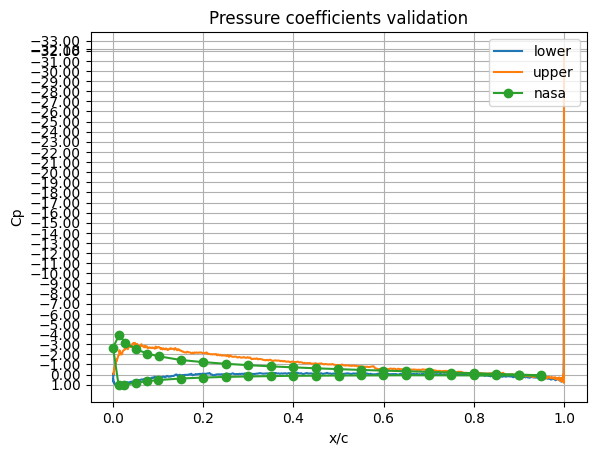

In [ ]:
line_clasifier = model.mesh.cell_data_dict["gmsh:physical"]["line"]
naca_points = np.unique(model.mesh.cells_dict["line"][(line_clasifier == 5)])
points = model.mesh.points[naca_points][:,0]
pressure = np.array(model.pressure_coeff.at(model.mesh.points[naca_points][:,:2]))

#shortening the plot to avoid funny buisness at the trailing edge
points = points
points -= np.min(points)
points *= 1/np.max(points)
pressure = pressure
middle = model.kwargs.get("n_airfoil")//2

plt.plot(points[:middle][::-1] ,np.flip(pressure[:middle]), label = "lower", color = "C0")
plt.plot(points[middle:] ,(pressure[middle:]), label = "upper", color = "C1")
plt.plot(nasa_9mil_10AoA[:,0], nasa_9mil_10AoA[:,1], color = "C2", label = "nasa", marker = 'o')
plt.yticks(np.hstack((np.arange(int(np.min(pressure))-1, 1.1, 1), np.min(pressure))))
plt.legend(loc = "upper right")
plt.xlabel('x/c')
plt.ylabel('Cp') 
plt.title('Pressure coefficients validation') 
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [ ]:
coords = np.array([233, 234, 237, 240, 241, 244, 245, 248, 251, 254, 255, 258, 259,
       262, 263, 266, 267, 270, 271, 274, 275, 278, 281, 282, 283, 286,
       287, 290, 291, 294, 295, 296, 299, 300, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 322, 323, 324,
       325, 326, 327, 330, 331, 332, 333, 334])

np.min(model.pressure_coeff.at(model.fd_mesh.coordinates.dat.data_ro[coords]))

np.float64(-0.08927038467082572)